**1) `statsmodels`:** `Linear Regression 클래스`의 `fit_regularized` 메서드를 사용하여 `Ridge/LASSO/Elastic Net` 추정

 - **Ridge:** 
 
$$\lambda_1 = 0,~~0 < \lambda_2 < 1 \\ =L_1 = 0,~~alpha \ne 0$$

- **LASSO:** 

$$0 < \lambda_1 < 1,~~\lambda_2 = 0 \\ =L_1 = 1,~~alpha \ne 0$$

- **Elastic Net:** 

$$0 < (\lambda_1, \lambda_2) < 1 \\ =0 < L_1 < 1,~~alpha \ne 0$$

**2) `sklearn`:** 정규화 회귀모형을 위한 `Ridge, Lasso, ElasticNet 클래스` 

```python
from sklearn.linear_model import Ridge, Lasso, ElasticNet
``



$$0 < (\lambda = alpha) < 1$$

```python
model_ridge = Ridge(alpha=0.5, fit_intercept=True, normalize=True, random_state=123)
model_ridge.fit(X_train, Y_train)
Y_trpred = model_ridge.predict(X_train)
Y_tepred = model_ridge.predict(X_test)
```

- [**LASSO:**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

 $$0 < (\lambda = alpha) < 1$$

 ```python
model_lasso = Lasso(alpha=0.5, fit_intercept=True, normalize=True, random_state=123)
model_lasso.fit(X_train, Y_train)
Y_trpred = model_lasso.predict(X_train)
Y_tepred = model_lasso.predict(X_test)
 ```

 - [**Elastic Net:**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

 $$0 < (\lambda_1, \lambda_2) < 1 \\ =0 < L_1 < 1,~~alpha \ne 0$$
   
 ```python
model_en = ElasticNet(alpha=0.01, l1_ratio=1, fit_intercept=True, normalize=True, random_state=123)
model_en.fit(X_train, Y_train)
Y_trpred = model_en.predict(X_train)
Y_tepred = model_en.predict(X_test)
 ```

**3) [keras](https://keras.io/api/layers/regularizers/):** `regularizer 파라미터`를 사용 및 `Dropout 레이어`를 사용하여 `일부 가중치만 추정` 효과

```python
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
```

 ```python
 # Elastic Net 
inputs = Input(shape=(X_train.shape[1],))
outputs = Dense(1, activation='linear',
                kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.01))(inputs)
model_Regul = Model(inputs, outputs)
Y_trpred = model_Regul.predict(X_train)
Y_tepred = model_Regul.predict(X_test)
 '''

 ```python
 # Dropout
inputs = Input(shape=(X_train.shape[1],))
outputs = Dense(1, activation='linear',
                kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.01))(inputs)
outputs = Dropout(0.2)(outputs)
model_Regul = Model(inputs, outputs)
Y_trpred = model_Regul.predict(X_train)
Y_tepred = model_Regul.predict(X_test)
 '''

In [4]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet



In [6]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1).head()


,0,1,2,3,4,5,6,7,8,9,0
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [10]:
alpha_weight = 0.5
model_ridge = Ridge(alpha=alpha_weight, fit_intercept=True,  random_state=123)

model_ridge.fit(X, y)
coef_ridge = pd.DataFrame(model_ridge.coef_, columns=['Ridge'])
coef_ridge

,Ridge
0,20.138007
1,-131.241495
2,383.483704
3,244.835070
4,-15.186741
5,-58.344136
6,-174.842371
7,121.984950
8,328.498757
9,110.886433


In [31]:
#Lasso
alpha_weight = 0.5
model_lasso = Lasso(alpha=alpha_weight, fit_intercept=True,  random_state=123)
model_lasso.fit(X, y)
coef_lasso = pd.DataFrame(model_lasso.coef_, columns=['Lasso'])
coef_lasso
#불필요한 변수에는 0으로 날려버리는 경향을 볼 수 있다

,Lasso
0,0.000000
1,-0.000000
2,471.041874
3,136.504084
4,-0.000000
5,-0.000000
6,-58.319017
7,0.000000
8,408.022685
9,0.000000


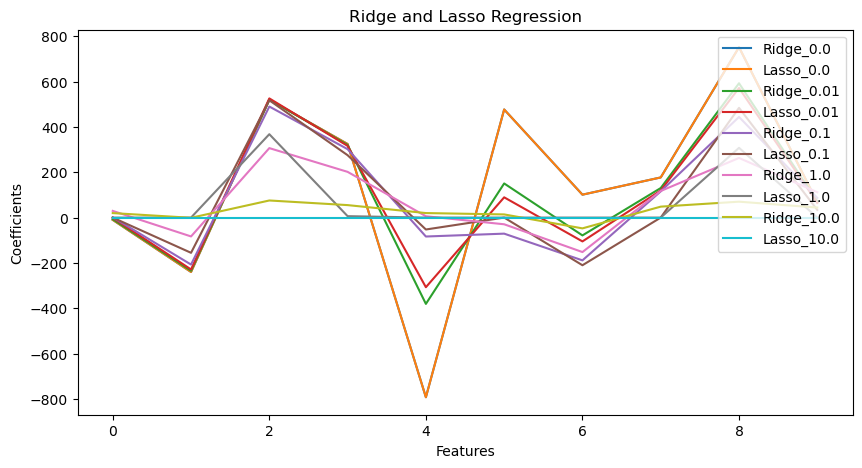

In [42]:
#Comparing Ridge and Lasso Regression by depending on alpha 0.0, 0.01, 0.1, 1.0, 10.0
alpha_weight = [0.0, 0.01, 0.1, 1.0, 10.0]
coef = pd.DataFrame()

for i, alpha in enumerate(alpha_weight):
    model_ridge = Ridge(alpha=alpha, fit_intercept=True,  random_state=123)
    model_ridge.fit(X, y)
    coef['Ridge_'+str(alpha)] = model_ridge.coef_
    model_lasso = Lasso(alpha=alpha, fit_intercept=True,  random_state=123)
    model_lasso.fit(X, y)
    coef['Lasso_'+str(alpha)] = model_lasso.coef_
coef

#Plotting the coefficients of Ridge and Lasso Regression
plt.figure(figsize=(10, 5))
plt.plot(coef)
plt.legend(coef.columns, loc='upper right')
plt.title('Ridge and Lasso Regression')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()


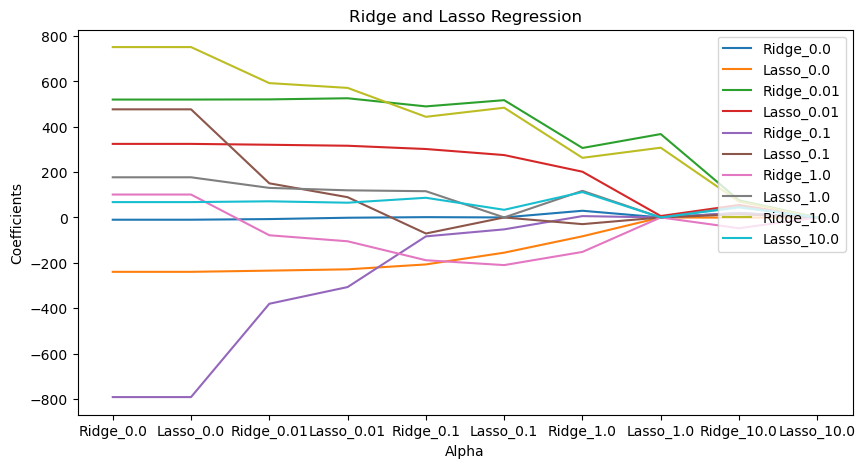

In [43]:
#Plot x = alpha, y = coefficients
plt.figure(figsize=(10, 5))
plt.plot(coef.T)
plt.legend(coef.columns, loc='upper right')
plt.title('Ridge and Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.show()


## NB

- **종류:**

> - **Gausian NB:** `정규분포`를 따르는 `연속형` 데이터에서 사용하는 NB 분류기로 `고차원 데이터셋`에 주로 사용
> - **Bernoulli NB:** `베르누이분포`를 따르는 `이진(Binary)` 데이터에서 사용하는 NB 분류기로 모델 `복잡도 조절 매개변수` $\alpha$ 존재
> - **Multinomial NB:** `다항분포`의 특성을 가지는 데이터에서 사용하는 NB 분류기로 모델 `복잡도 조절 매개변수` $\alpha$ 존재

---

**2) 사용방법:**

 ```python
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
```

```python
 # 학습 및 예측
model_gnb = GaussianNB()
model_gnb.fit(X_train, Y_train)
Y_trpred = model_gnb.predict(X_train)
Y_tepred = model_gnb.predict(X_test)
```

In [1]:
# 필요 라이브러리 호출
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [2]:
from mlxtend.plotting import plot_decision_regions

# #사용자 정의 함수 
# from module_regression import *
# from module_classification import *


ModuleNotFoundError: No module named 'module_regression'

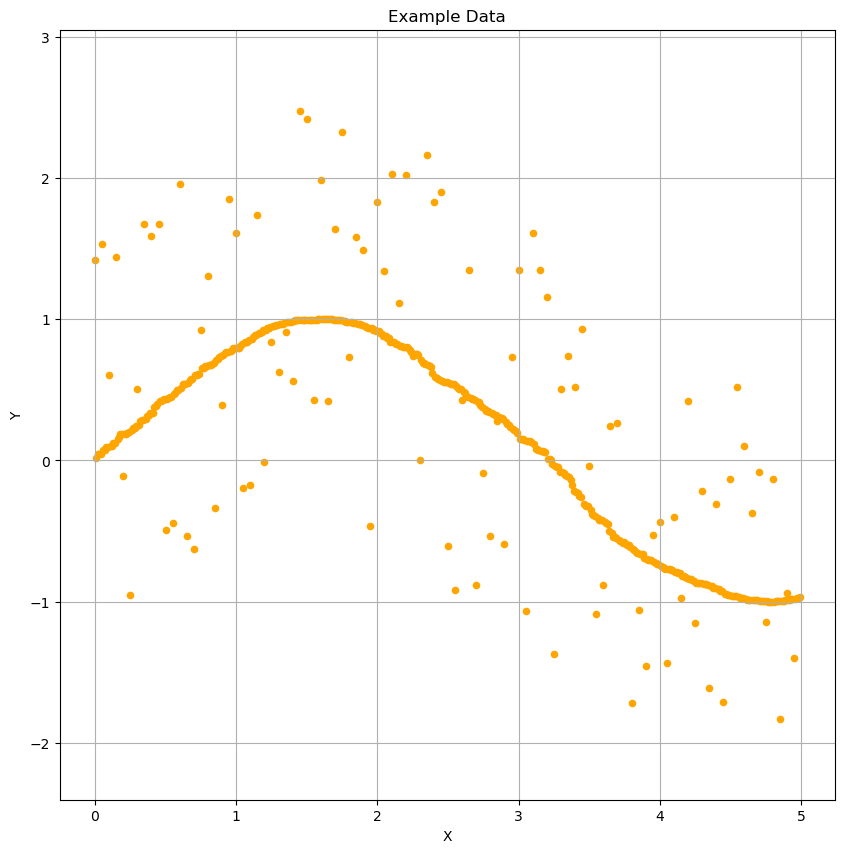

In [14]:
#Load example data

rng = np.random.RandomState(10) # 난수 생성을 위한 seed 지정

X_train = np.sort(5 * rng.rand(500, 1), axis=0) # 500개의 데이터를 생성
Y_train = np.sin(X_train).ravel()                        # sin함수의 예측을 목표로한다
#ravel : 다차원 배열을 1차원으로 바꿔줌
X_test = np.arange(0.0, 5.0, 5/X_train.shape[0])[:, np.newaxis]
Y_test = Y_train.copy()
Y_test[::5] = Y_test[::5] + 3 * (0.5 - rng.rand(100))

# 예제 데이터 시각화
plt.figure(figsize=(10,10))
plt.scatter(X_test, Y_test, s=20, c='orange')
plt.title('Example Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis("equal")
plt.grid()
plt.show()

MAE: 0.457
MSE: 0.333


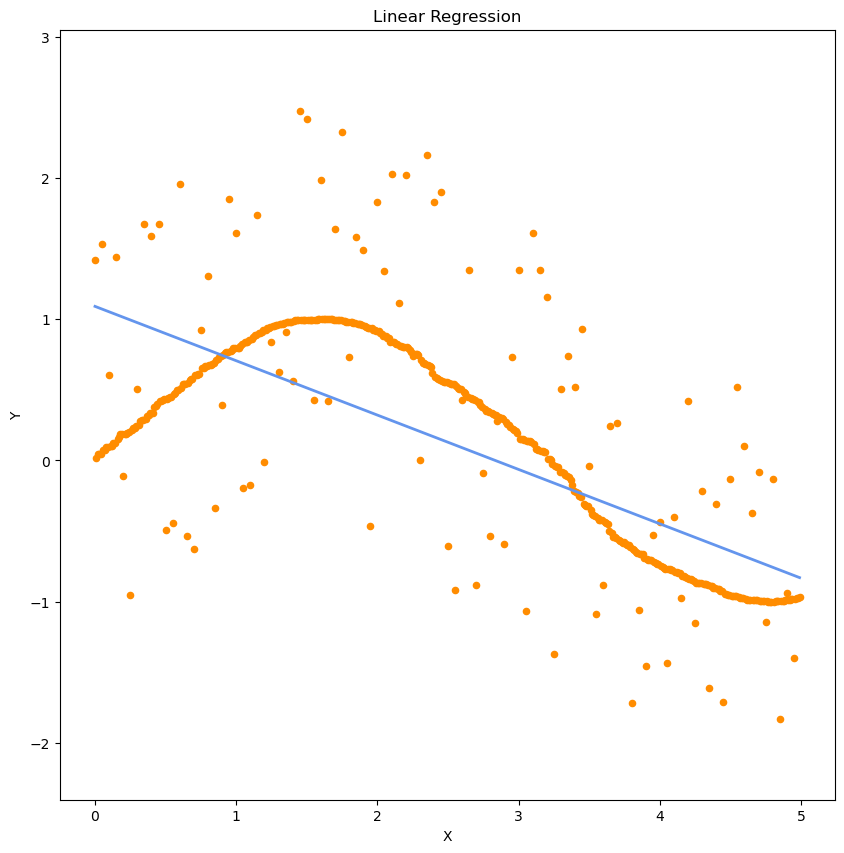

In [7]:
#Modeling Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
Y_pred_lr = model_lr.predict(X_test)
# 예측 결과 시각화
plt.figure(figsize=(10,10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.plot(X_test, Y_pred_lr, color='cornflowerblue', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis("equal")

# MODEL EVALUATION
# MAE
mae_lr = mean_absolute_error(Y_test, Y_pred_lr)
print('MAE: %.3f' % mae_lr)
# MSE
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
print('MSE: %.3f' % mse_lr)


MAE: 0.457
MSE: 0.333


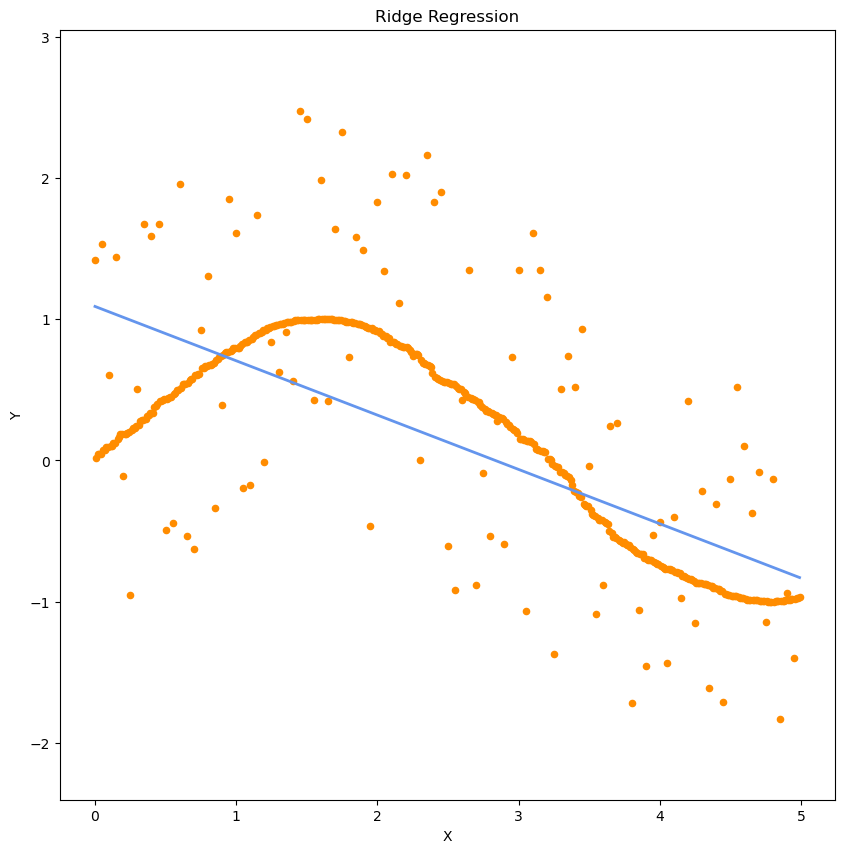

In [10]:
#Regularization of Linear Regression
#Ridge Regression
alpha_weight = 0.5
model_ridge = Ridge(alpha=alpha_weight, fit_intercept=True,  random_state=123)
model_ridge.fit(X_train, Y_train)
Y_pred_ridge = model_ridge.predict(X_test)
# 예측 결과 시각화
plt.figure(figsize=(10,10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.plot(X_test, Y_pred_ridge, color='cornflowerblue', linewidth=2)
plt.title('Ridge Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis("equal")
#Test, train error
# MAE
mae_ridge = mean_absolute_error(Y_test, Y_pred_ridge)
print('MAE: %.3f' % mae_ridge)
# MSE
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
print('MSE: %.3f' % mse_ridge)


(-0.24950000000000003,
 5.2395000000000005,
 -2.0451287430504204,
 2.6933063802860513)

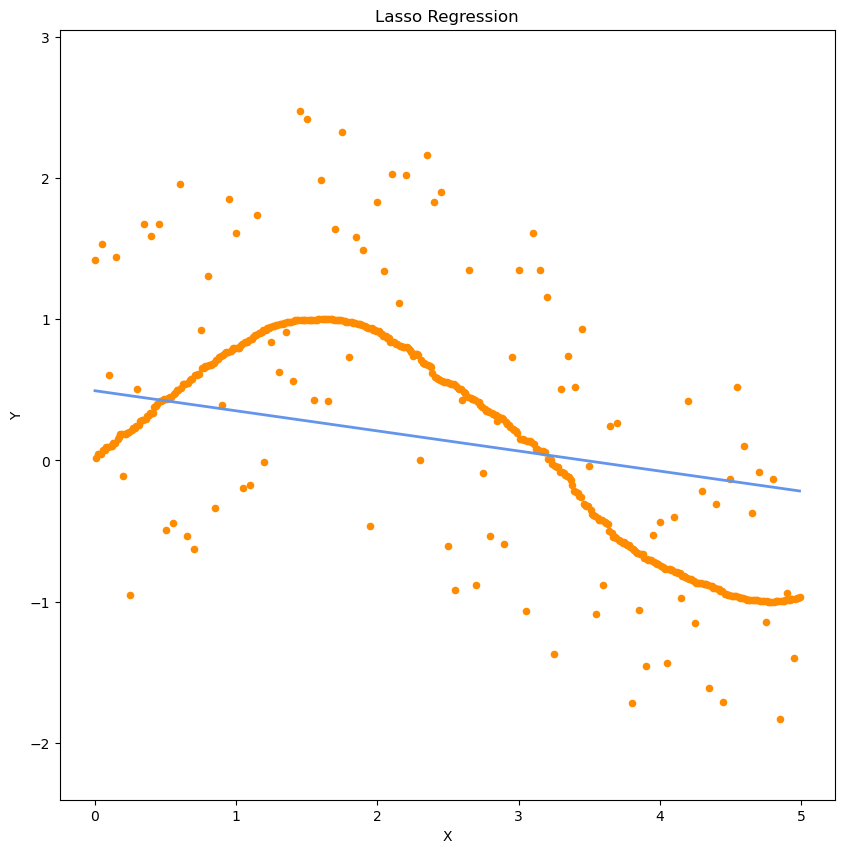

In [12]:
#LASSO Regression
alpha_weight = 0.5
model_lasso = Lasso(alpha=alpha_weight, fit_intercept=True,  random_state=123)
model_lasso.fit(X_train, Y_train)
Y_pred_lasso = model_lasso.predict(X_test)
# visualization
plt.figure(figsize=(10,10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.plot(X_test, Y_pred_lasso, color='cornflowerblue', linewidth=2)
plt.title('Lasso Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis("equal")

(-0.24950000000000003,
 5.2395000000000005,
 -2.0451287430504204,
 2.6933063802860513)

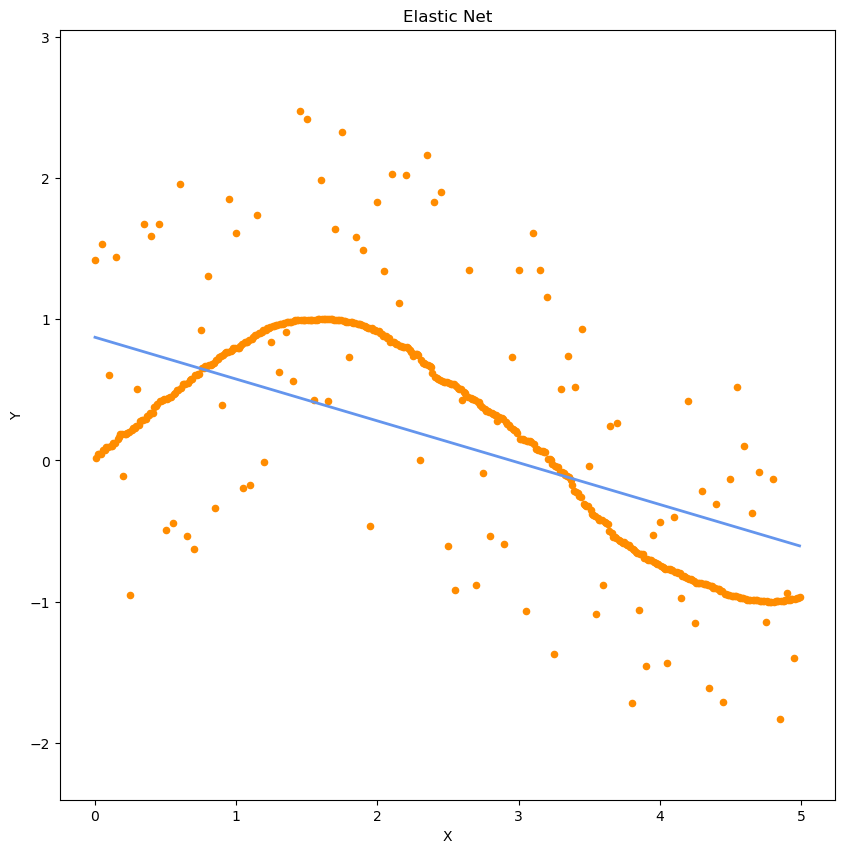

In [13]:
#Elastic Net
alpha_weight = 0.5
l1_ratio_weight = 0.1
model_en = ElasticNet(alpha=alpha_weight, l1_ratio=l1_ratio_weight, fit_intercept=True,  random_state=123)
model_en.fit(X_train, Y_train)
Y_pred_en = model_en.predict(X_test)
# visualization
plt.figure(figsize=(10,10))
plt.scatter(X_test, Y_test, s=20, c='darkorange')
plt.plot(X_test, Y_pred_en, color='cornflowerblue', linewidth=2)
plt.title('Elastic Net')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis("equal")


# Classification

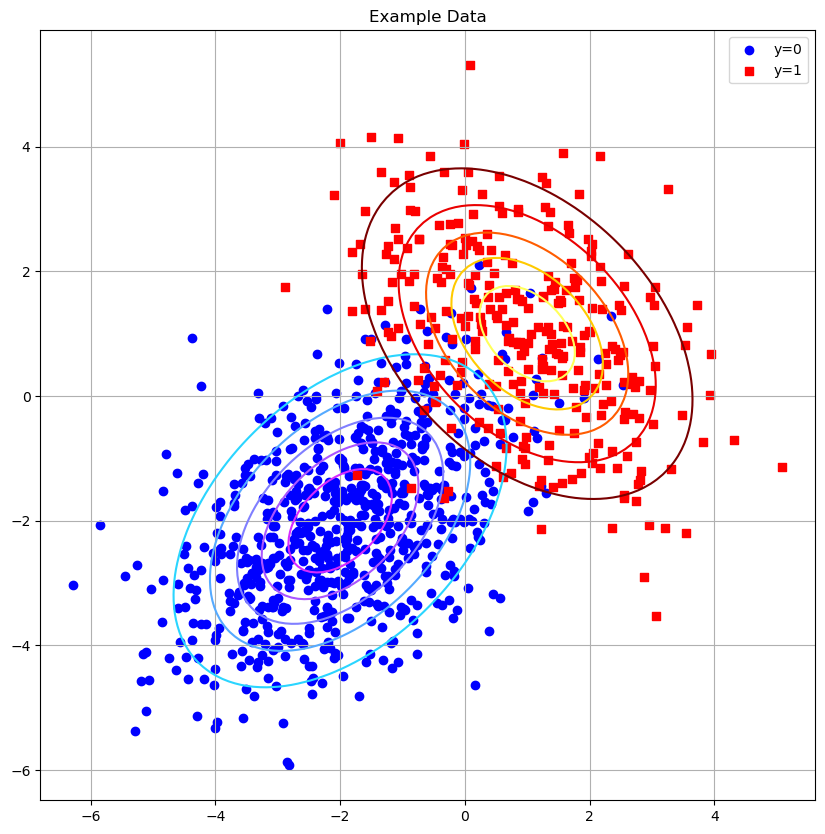

In [23]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[2, 0.9], [0.9, 2]], seed=123)
rv1 = sp.stats.multivariate_normal([1, 1], [[2, -0.8], [-0.8, 2]], seed=123)
#multivate_normal 랜덤 생성
#seed : 난수 생성을 위한 seed 지정

X0 = rv0.rvs(700)
X1 = rv1.rvs(300)
X = np.vstack([X0, X1])
Y = np.hstack([np.zeros(700), np.ones(300)])

plt.figure(figsize=(10,10))
xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")
plt.legend()
plt.title('Example Data')
plt.axis("equal")
plt.grid()
plt.show()
# 데이터 분리 및 스케일링
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Text(0, 0.5, 'Y')

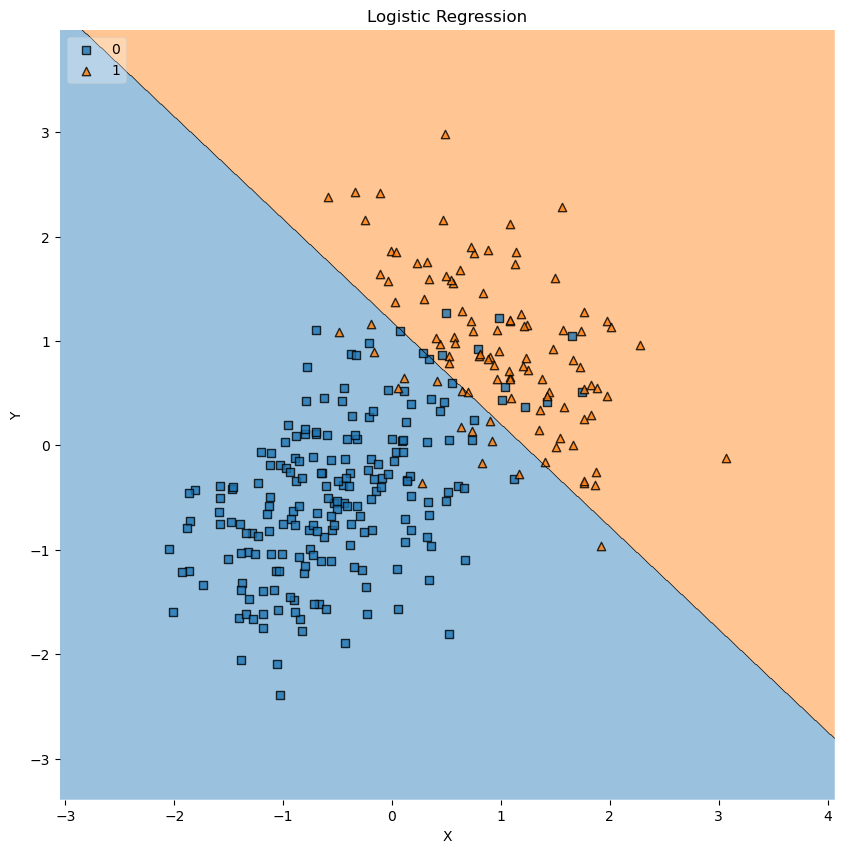

In [28]:
# 모델링: Logistic
## 학습
model_logitreg = LogisticRegression()
model_logitreg.fit(X_train, Y_train)
Y_pred_logitreg = model_logitreg.predict(X_test)
# 시각화
#Y_test as integer
plt.figure(figsize=(10,10))
plot_decision_regions(X_test, Y_test.astype(np.integer), clf=model_logitreg, legend=2)
plt.title('Logistic Regression')
plt.xlabel('X')
plt.ylabel('Y')


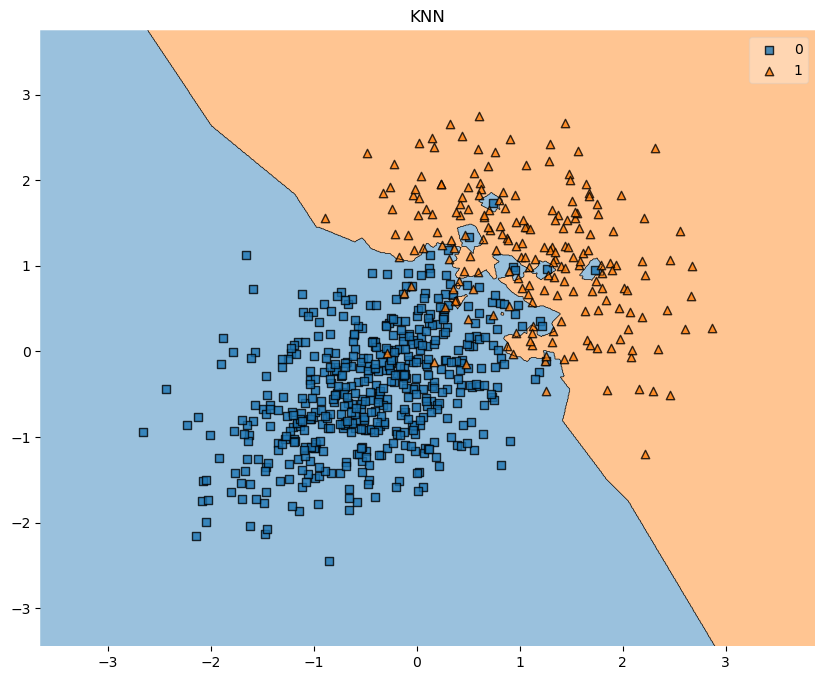

In [32]:
# 모델링: KNN
## 학습
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10,8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_knn)
plt.title('KNN')
plt.show()


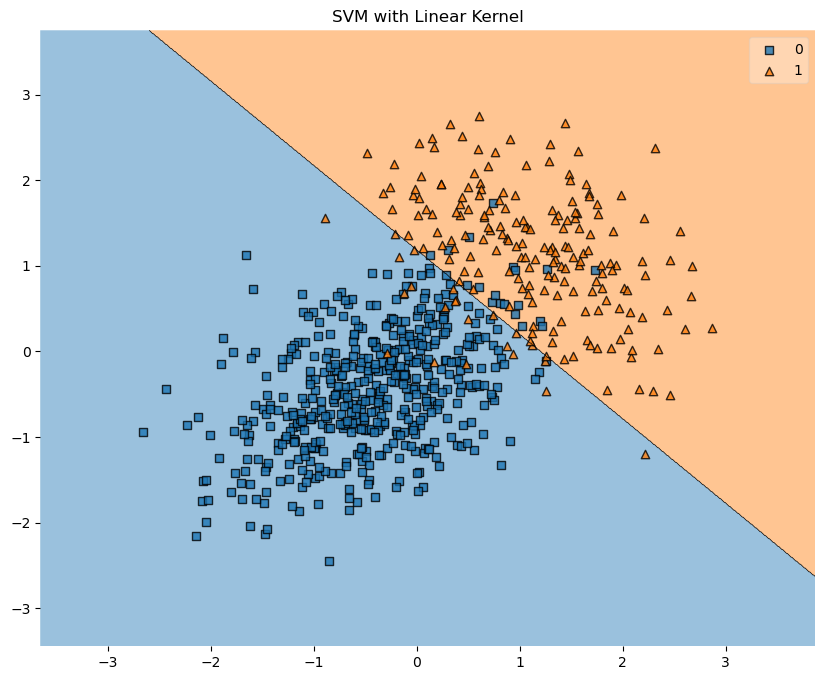

In [33]:
# 모델링: SVM with linear Kernel
## 학습
C = 1    # SVM의 정규화 hyperparameter
model_svm = SVC(kernel='linear', C=C, random_state=123)
model_svm.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10,8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_svm)
plt.title('SVM with Linear Kernel')
plt.show()


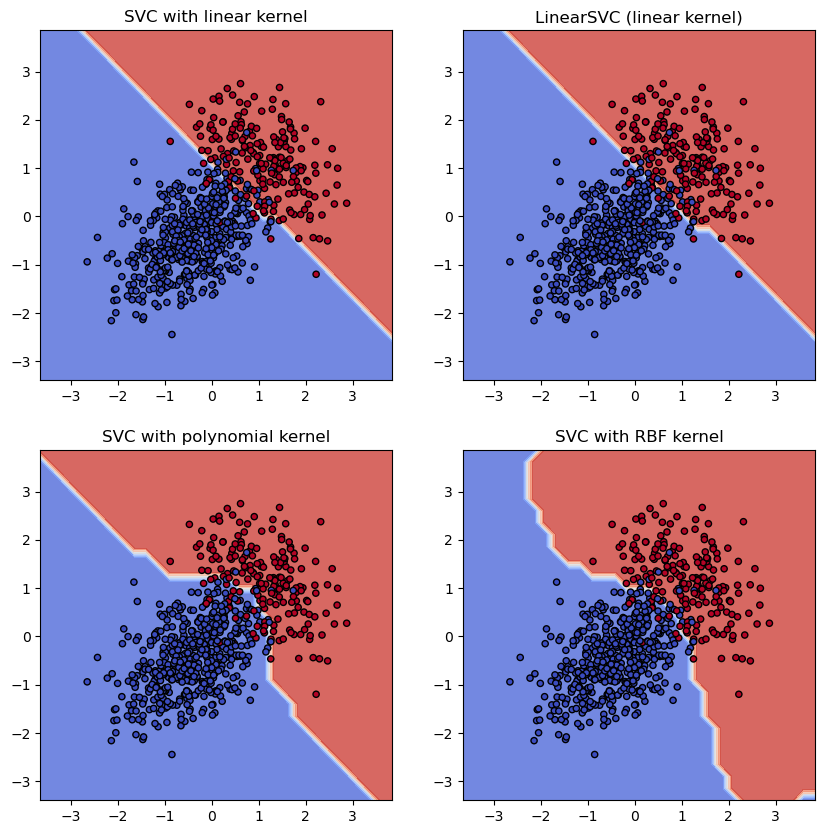

In [34]:
# SVM 선형 및 비선형 알고리즘 Classification 결과 비교
# kernel='linear' 대신 LinearSVC가 존재하지만 비용함수와 알고리즘 차이가 있어 결과 차이 존재
# 모델링 정리
C = 1    # SVM의 정규화 hyperparameter
models = (SVC(kernel='linear', C=C),
          LinearSVC(C=C, max_iter=10000),
          SVC(kernel='poly', gamma='auto', C=C),
          SVC(kernel='rbf', gamma='auto', C=C))
model_svm_kernel = (model_svm.fit(X_train, Y_train) for model_svm in models)

## 데이터 3차원 인식으로 재정리
X_train_min, X_train_max = X_train.min()-1, X_train.max()+1
X_test_min, X_test_max = X_test.min()-1, X_test.max()+1
xx, yy = np.meshgrid(np.arange(X_train_min, X_train_max, 0.25), np.arange(X_test_min, X_test_max, 0.25))

## 결과비교 시각화
fig, sub = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

titles = ('SVC with linear kernel', 'LinearSVC (linear kernel)',
          'SVC with polynomial kernel', 'SVC with RBF kernel')
for clf, title, ax in zip(model_svm_kernel, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
plt.show()

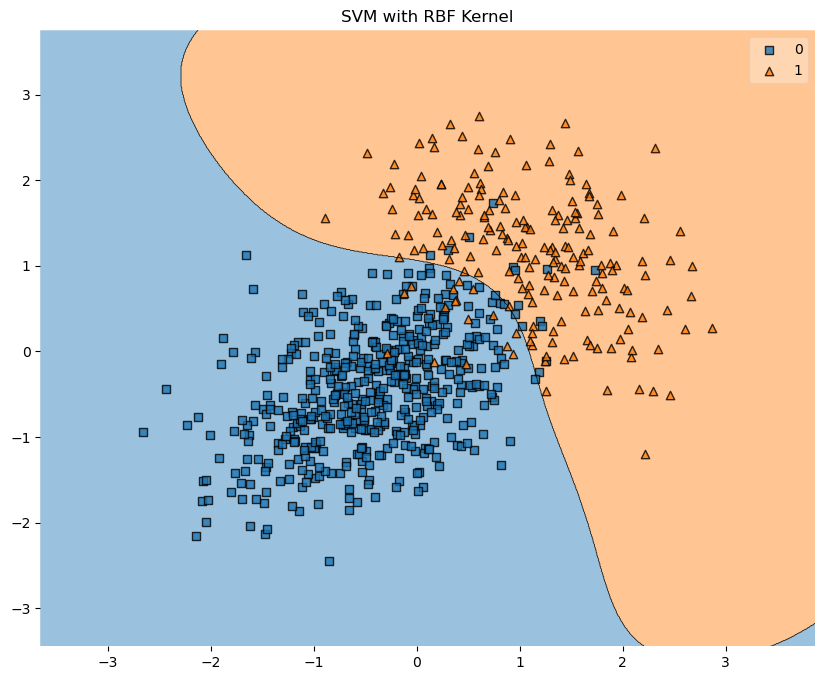

In [35]:
# 모델링: SVM with RBF Kernel
## 학습
C = 1    # SVM의 정규화 hyperparameter
model_svmr = SVC(kernel='rbf', C=C, random_state=123)
model_svmr.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10,8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_svmr)
plt.title('SVM with RBF Kernel')
plt.show()


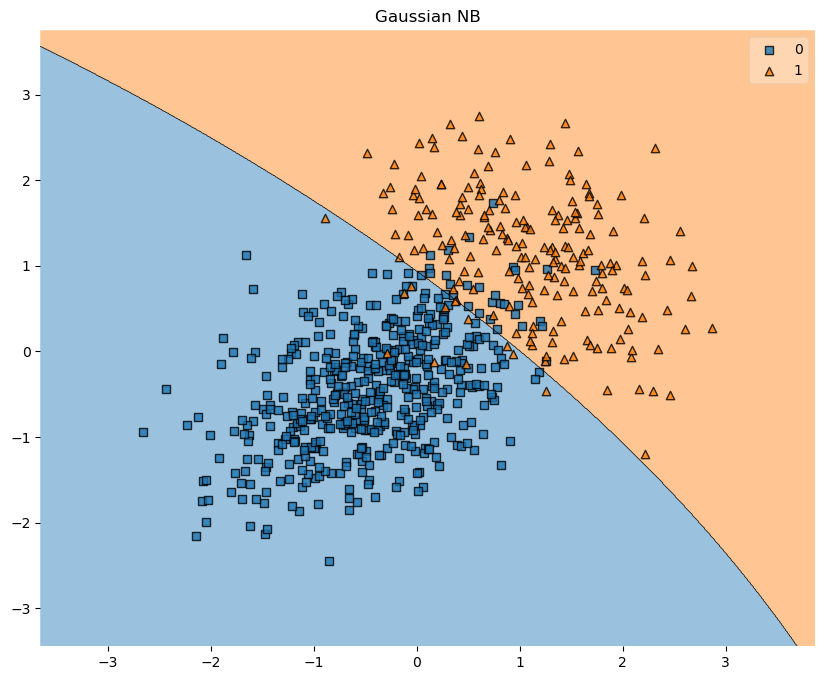

In [37]:
# 모델링: NB
## 학습
model_gnb = GaussianNB()
model_gnb.fit(X_train, Y_train)
## 학습결과
plt.figure(figsize=(10,8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_gnb)
plt.title('Gaussian NB')
plt.show()
